In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
#importing, scaling reshaping and vectorizing the data set
((trainX, trainY), (testX, testY)) = cifar10.load_data()

#scaling data
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0


#vectorizing the labels
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [3]:
#initializing the label names
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
             'frog', 'horse', 'ship', 'truck']

In [4]:
#initializing the model
chanDim= -1
def model():
    
    model = Sequential()
    #first layer of Conv2D
    model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Conv2D(32, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    #second layer of Conv2D
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Conv2D(64, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    #FC layet
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [5]:
def step_decay(epoch):
    
    #initialize the initial learning rate, drop factor, and
    # number of epochs after which drop will occur
    initAlpha = 0.01
    factor = 0.25
    dropEvery = 5
    
    #compute learning rate of current epoch
    alpha = initAlpha * (factor ** np.floor ((1 + epoch)/dropEvery))
    
    return float(alpha)

In [6]:
#define the list of call backs to be passed to model during training
callbacks = [LearningRateScheduler(step_decay)]

In [7]:
#initializing the optimizer and model
opt = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
model = model()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________

In [8]:
#training the network
H = model.fit(trainX, trainY, validation_data = (testX, testY), 
              batch_size = 64, epochs = 40, callbacks = callbacks, 
              verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 13s 257us/sample - loss: 1.6611 - acc: 0.4476 - val_loss: 1.2044 - val_acc: 0.5682
Epoch 2/40
50000/50000 [==============================] - 11s 221us/sample - loss: 1.1781 - acc: 0.5927 - val_loss: 0.8998 - val_acc: 0.6849
Epoch 3/40
50000/50000 [==============================] - 11s 219us/sample - loss: 0.9934 - acc: 0.6544 - val_loss: 0.8457 - val_acc: 0.7004
Epoch 4/40
50000/50000 [==============================] - 11s 215us/sample - loss: 0.8843 - acc: 0.6940 - val_loss: 0.8016 - val_acc: 0.7231 - ETA: 1s - loss: 0.8850 - acc: - ETA: 0s - loss: 0.8861 - acc: 0.693 - ETA: 0s - loss: 0.886
Epoch 5/40
50000/50000 [==============================] - 11s 227us/sample - loss: 0.7410 - acc: 0.7386 - val_loss: 0.6985 - val_acc: 0.7576
Epoch 6/40
50000/50000 [==============================] - 12s 234us/sample - loss: 0.6869 - acc: 0.7594 - val_loss: 0.6863 - val_acc: 0.7612
Epoch 7/40

In [9]:
#evaluating the network
predictions = model.predict(testX, batch_size = 64)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1),
                           target_names = labelNames))

              precision    recall  f1-score   support

    airplane       0.84      0.80      0.82      1000
  automobile       0.91      0.88      0.89      1000
        bird       0.74      0.68      0.71      1000
         cat       0.62      0.60      0.61      1000
        deer       0.75      0.80      0.77      1000
         dog       0.70      0.71      0.70      1000
        frog       0.79      0.89      0.84      1000
       horse       0.87      0.83      0.85      1000
        ship       0.90      0.89      0.89      1000
       truck       0.85      0.88      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



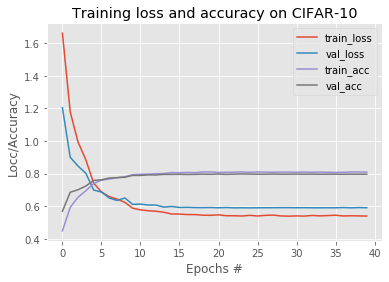

In [10]:
#plotting the training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 40), H.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 40), H.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 40), H.history['acc'], label = 'train_acc')
plt.plot(np.arange(0, 40), H.history['val_acc'], label = 'val_acc')
plt.title('Training loss and accuracy on CIFAR-10')
plt.xlabel('Epochs #')
plt.ylabel('Locc/Accuracy')
plt.legend()
plt.savefig('output.png')
plt.show()